## car_evaluation.csv

- Used car market has significantly grown in recent times with clients ranging from used car dealers and buyers. You are provided with a **car evaluation dataset** that has features like price, doors, safety, and so on. You are required to create a robust model that allows stakeholders to **predict**:
- **The condition of a used vehicle**.

## Description of Columns
- **buying**: buying price
- **maint**: price of the maintenance
- **doors**: number of doors
- **persons**: capacity in terms of persons to carry
- **lug_boot**: the size of luggage boot
- **safety**: estimated safety of the car
- **class**: evaluation level(unacceptable, acceptable, good, very good)

In [1]:
# importing libraries
import pandas as pd                  # Preparing high-level data sets, etc.
import numpy as np                   # library for multi-dimensional array, matrix processing, etc.
import matplotlib.pyplot as plt      # Visualization Library
import seaborn as sns                # Visualization Library 
%matplotlib inline

In [2]:
df = pd.read_csv("car_evaluation.csv")
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
print('Number of rows are',df.shape[0], ", and number of columns are ",df.shape[1])

Number of rows are 1728 , and number of columns are  7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.isnull().sum().sum()
## No NULL values

0

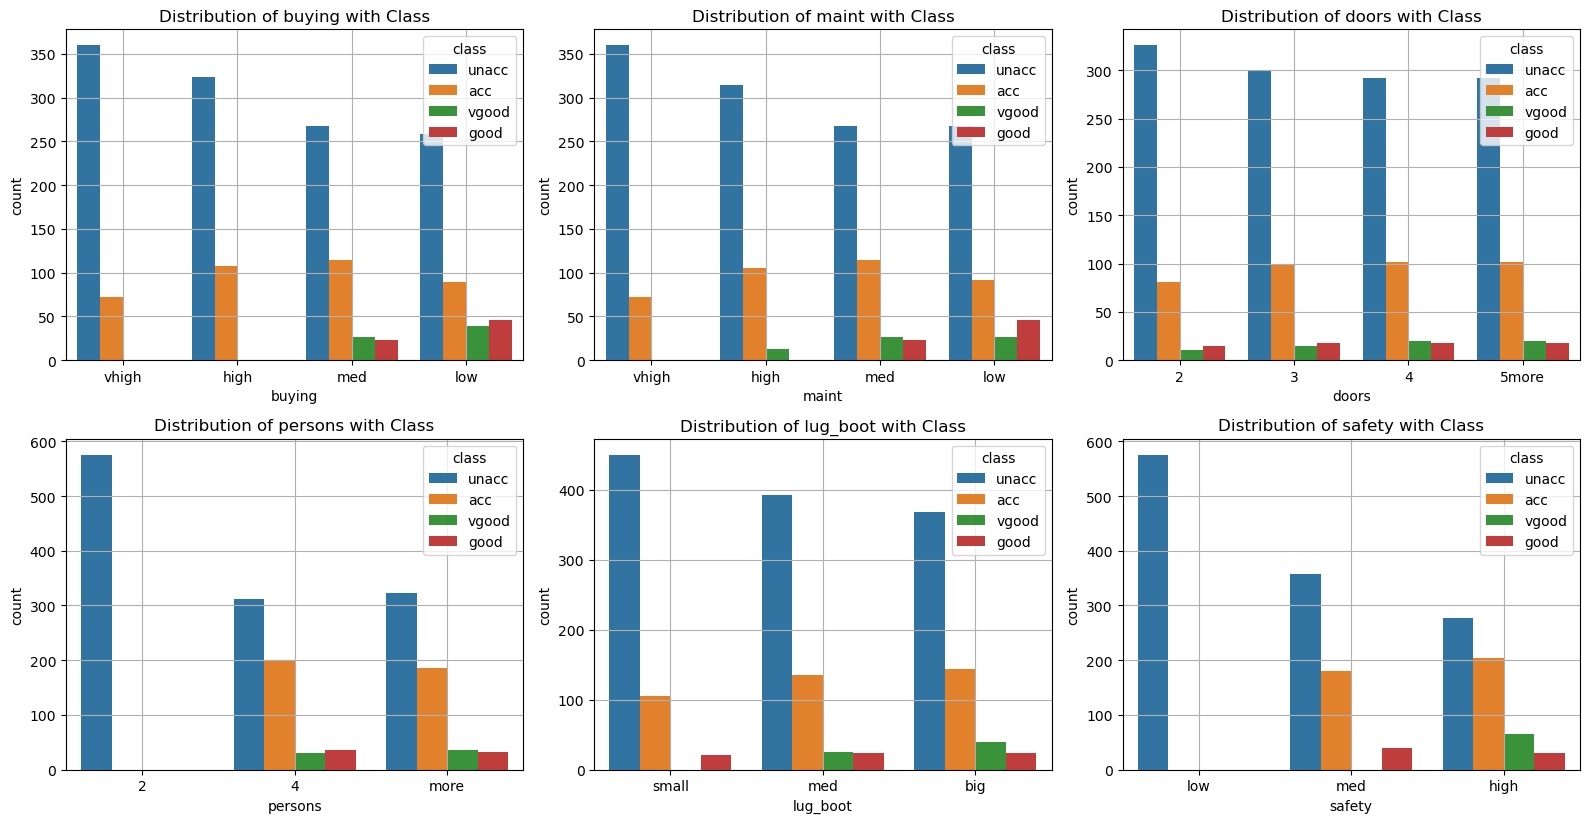

In [6]:
# Set the size of the plots
plt.figure(figsize=(16, 12))

# Loop through each column in the DataFrame except the target variable 'class'
for i, col in enumerate([c for c in df.columns if c != 'class']):  # Exclude 'class' column
    plt.subplot(3, 3, i+1)  # Adjust the subplot grid as per the number of columns
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f'Distribution of {col} with Class')
    plt.grid(True)
    plt.tight_layout()

# Show the plots
plt.show()

In [7]:
df_copy = df.copy(deep=True)
df_copy.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
# Assuming df_copy is a DataFrame
# Function to summarize unique values and their counts in a table format
def summarize_unique_values(df):
    summary = {}

    for column in df.columns:
        unique_counts = df[column].value_counts().sort_index()
        summary[column] = {
            'Values': unique_counts.index.tolist(),
            'Counts': unique_counts.values.tolist(),
            " ": "-"*40                              ## Just for separation
      }
            
    return summary

In [9]:
# Apply the function to summarize unique values
unique_summary = summarize_unique_values(df_copy)
unique_summary

{'buying': {'Values': ['high', 'low', 'med', 'vhigh'],
  'Counts': [432, 432, 432, 432],
  ' ': '----------------------------------------'},
 'maint': {'Values': ['high', 'low', 'med', 'vhigh'],
  'Counts': [432, 432, 432, 432],
  ' ': '----------------------------------------'},
 'doors': {'Values': ['2', '3', '4', '5more'],
  'Counts': [432, 432, 432, 432],
  ' ': '----------------------------------------'},
 'persons': {'Values': ['2', '4', 'more'],
  'Counts': [576, 576, 576],
  ' ': '----------------------------------------'},
 'lug_boot': {'Values': ['big', 'med', 'small'],
  'Counts': [576, 576, 576],
  ' ': '----------------------------------------'},
 'safety': {'Values': ['high', 'low', 'med'],
  'Counts': [576, 576, 576],
  ' ': '----------------------------------------'},
 'class': {'Values': ['acc', 'good', 'unacc', 'vgood'],
  'Counts': [384, 69, 1210, 65],
  ' ': '----------------------------------------'}}

In [10]:
# Mapping dictionary
buying_mapping = {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}

# Apply the mapping to the "buying" column
df_copy.loc[:,"buying"] = df_copy["buying"].map(buying_mapping)


In [11]:
# Mapping dictionary
maint_mapping = {'low': 4, 'med': 3, 'high': 2, 'vhigh': 1}

# Apply the mapping to the "maint" column
df_copy.loc[:,"maint"] = df_copy["maint"].map(maint_mapping)

In [12]:
# Mapping dictionary 
doors_mapping = {"2":2, "3":3, "4":4, '5more': 5}

# Apply the mapping to the "doors" column
df_copy.loc[:,"doors"] = df_copy["doors"].map(doors_mapping)

In [13]:
# Mapping dictionary
persons_mapping = {"2":2, "4":4, 'more': 5}

# Apply the mapping to the "persons" column
df_copy.loc[:,"persons"] = df_copy["persons"].map(persons_mapping)

In [14]:
lug_boot_mapping = {"big":3, "med":2, 'small': 1}

# Apply the mapping to the "lug_boot" column
df_copy.loc[:,"lug_boot"] = df_copy["lug_boot"].map(lug_boot_mapping)

In [15]:
safety_mapping = {"high":3, "med":2, 'low': 1}

# Apply the mapping to the "safety" column
df_copy.loc[:,"safety"] = df_copy["safety"].map(safety_mapping)

In [16]:
class_mapping = {"unacc":1, "acc":2, 'good': 3, "vgood":4}

# Apply the mapping to the "class" column
df_copy.loc[:,"class"] = df_copy["class"].map(class_mapping)

In [17]:
df_copy.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,1,2,2,1,1,1
1,4,1,2,2,1,2,1
2,4,1,2,2,1,3,1
3,4,1,2,2,2,1,1
4,4,1,2,2,2,2,1


In [18]:
df_copy.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,4,1,2,2,1,1,1
freq,432,432,432,576,576,576,1210


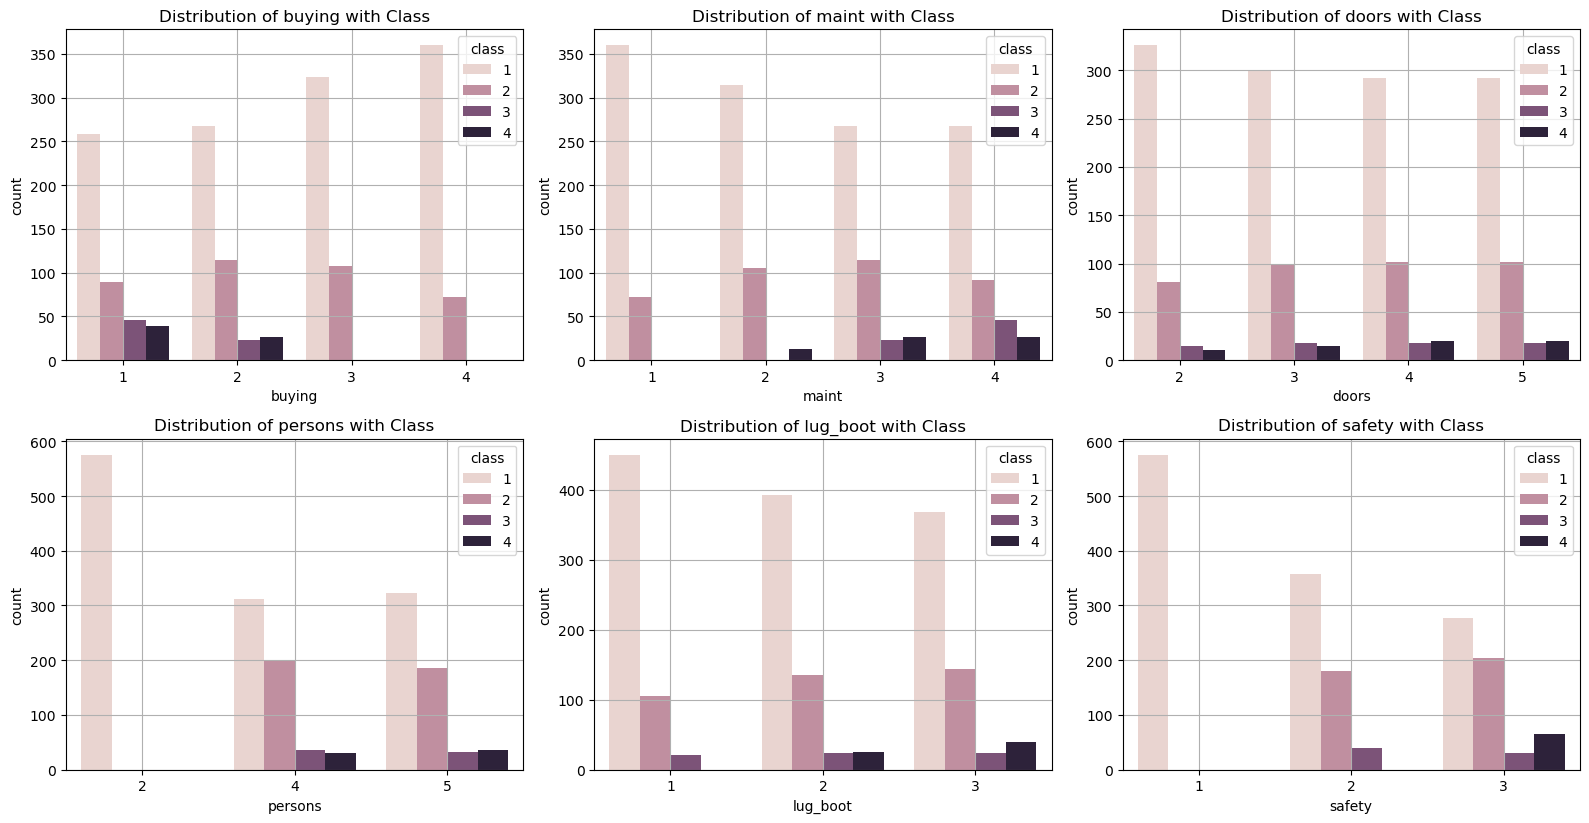

In [19]:
# Set the size of the plots
plt.figure(figsize=(16, 12))

# Loop through each column in the DataFrame except the target variable 'class'
for i, col in enumerate([c for c in df_copy.columns if c != 'class']):  # Exclude 'class' column
    plt.subplot(3, 3, i+1)  # Adjust the subplot grid as per the number of columns
    sns.countplot(x=col, hue='class', data=df_copy)
    plt.title(f'Distribution of {col} with Class')
    plt.grid(True)
    plt.tight_layout()

# Show the plots
plt.show()


In [20]:
df_copy.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [21]:
from sklearn.preprocessing import StandardScaler

# Make a copy of the DataFrame to avoid changing the original dataset
df_scaled = df_copy.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to all columns directly
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

# Display the scaled data
df_scaled.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,1.341641,-1.341641,-1.341641,-1.336306,-1.224745,-1.224745,-0.560349
1,1.341641,-1.341641,-1.341641,-1.336306,-1.224745,0.000000,-0.560349
2,1.341641,-1.341641,-1.341641,-1.336306,-1.224745,1.224745,-0.560349
3,1.341641,-1.341641,-1.341641,-1.336306,0.000000,-1.224745,-0.560349
4,1.341641,-1.341641,-1.341641,-1.336306,0.000000,0.000000,-0.560349


In [22]:
df_copy.corr()

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.000000e+00,2.643564e-15,4.242286e-15,7.983938e-16,-1.525866e-16,-1.554300e-15,-0.282750
maint,2.643564e-15,1.000000e+00,-7.726330e-16,-1.905677e-16,1.148622e-16,2.582993e-16,0.232422
doors,4.242286e-15,-7.726330e-16,1.000000e+00,-9.989138e-17,6.080942e-17,9.909683e-17,0.066057
persons,7.983938e-16,-1.905677e-16,-9.989138e-17,1.000000e+00,1.514191e-18,1.362772e-17,0.373459
lug_boot,-1.525866e-16,1.148622e-16,6.080942e-17,1.514191e-18,1.000000e+00,7.131641e-18,0.157932
safety,-1.554300e-15,2.582993e-16,9.909683e-17,1.362772e-17,7.131641e-18,1.000000e+00,0.439337
class,-2.827504e-01,2.324215e-01,6.605665e-02,3.734592e-01,1.579317e-01,4.393373e-01,1.000000


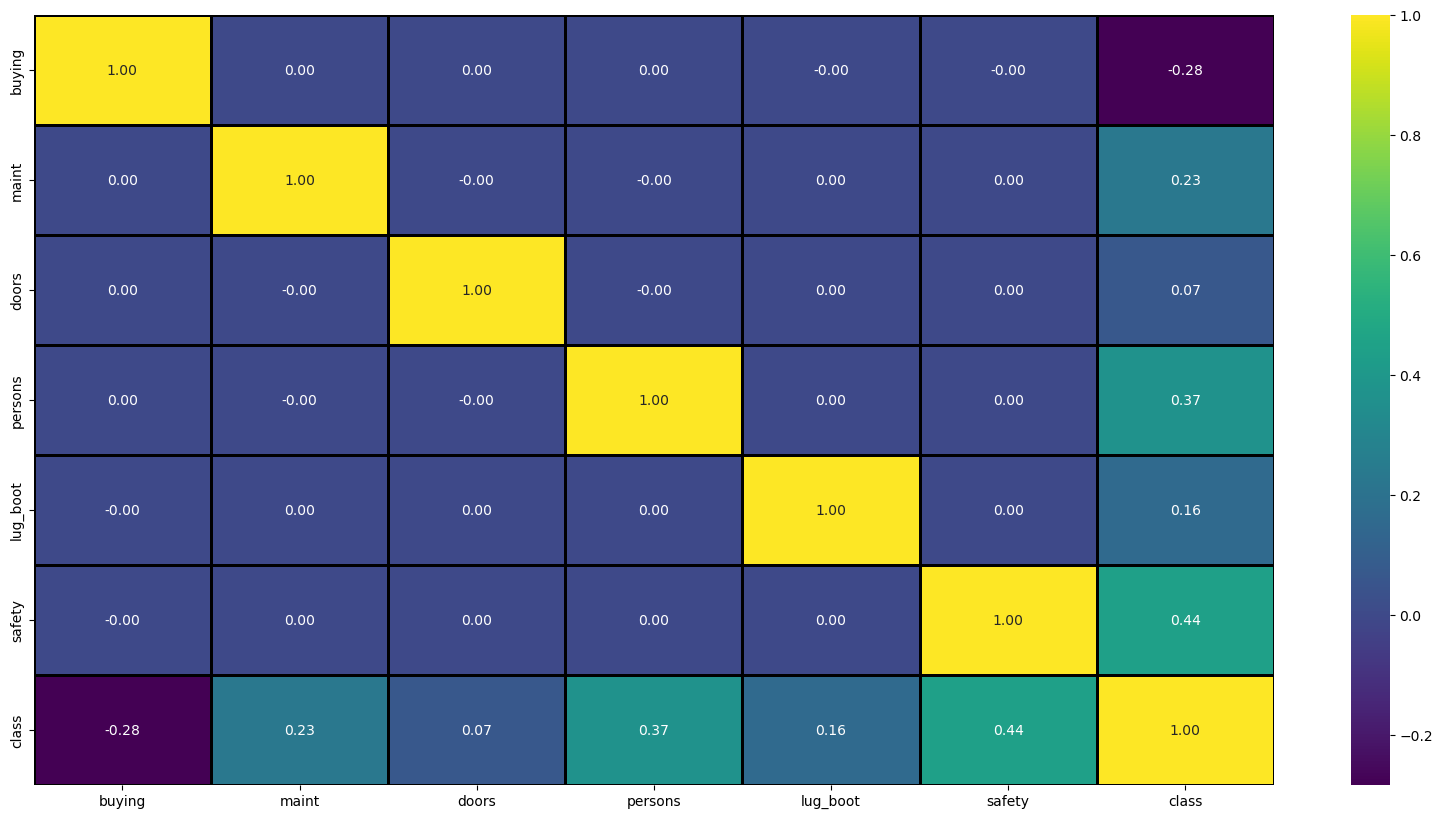

In [23]:
# Calculate the correlation matrix
correlation_matrix = df_copy.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plot the heatmap with boundaries
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", 
            linewidths=1, linecolor='black')  # Adding boundaries

# Display the plot
plt.savefig("Correlation Martix of Car_Evaluation", dpi=1080)
plt.show()


In [24]:
df_copy.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,1,2,2,1,1,1
1,4,1,2,2,1,2,1
2,4,1,2,2,1,3,1
3,4,1,2,2,2,1,1
4,4,1,2,2,2,2,1


## Decision Tree Classifier

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df_copy.drop(columns='class')
y = df_copy['class']

# Check the data type of the target variable and convert if necessary
if not pd.api.types.is_numeric_dtype(y):
    y = y.astype('category').cat.codes

# Specify numerical columns for scaling
numerical_cols = ['persons', 'doors']  # Replace with your numerical columns

# Standardize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [26]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9614643545279383


In [27]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       358
           1       0.94      0.92      0.93       118
           2       0.76      0.84      0.80        19
           3       0.87      0.83      0.85        24

    accuracy                           0.96       519
   macro avg       0.89      0.90      0.89       519
weighted avg       0.96      0.96      0.96       519



## Random Forest Classifier

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# Define features and target variable
X = df_copy.drop(columns='class')
y = df_copy['class']

# Check the data type of the target variable and convert if necessary
if not pd.api.types.is_numeric_dtype(y):
    y = y.astype('category').cat.codes

# Specify numerical columns for scaling
numerical_cols = ['persons', 'doors']  # Replace with your numerical columns

# Standardize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [29]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9691714836223507


In [30]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       358
           1       0.94      0.93      0.94       118
           2       0.77      0.89      0.83        19
           3       0.88      0.88      0.88        24

    accuracy                           0.97       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.97      0.97      0.97       519



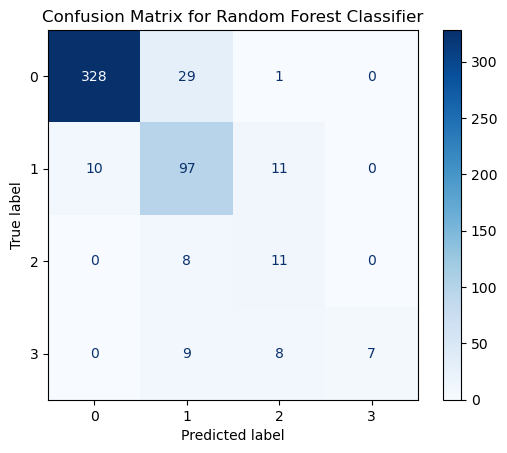

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


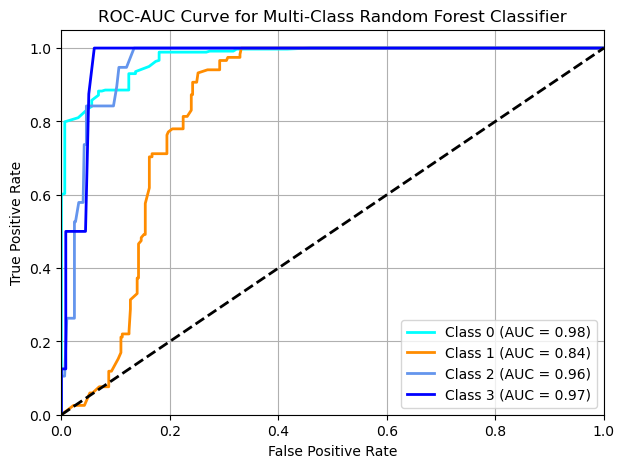

In [41]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the target labels
y_test_binarized = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_binarized.shape[1]

# Get predicted probabilities
y_prob = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(7, 5))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue',"Blue" ])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Multi-Class Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Gradient Boosting Classifier
### AdaBoost Classifier
### Random Forest Classifier

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [32]:
# Define features and target variable
X = df_copy.drop(columns='class')
y = df_copy['class']

In [33]:
# Check the data type of the target variable and convert if necessary
if not pd.api.types.is_numeric_dtype(y):
    y = y.astype('category').cat.codes

# Specify numerical columns for scaling
numerical_cols = ['persons', 'doors']  # Replace with your numerical columns

In [34]:
# Standardize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Define and fit the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME')  # Use SAMME to avoid deprecation warning
}

In [36]:
# Dictionary to store performance
performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance[name] = accuracy

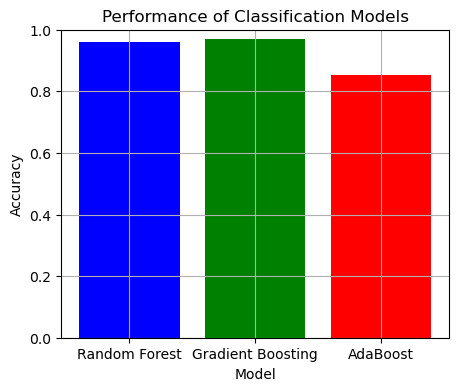

In [37]:
# Plotting the performance
plt.figure(figsize=(5, 4))
plt.bar(performance.keys(), performance.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Performance of Classification Models')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for accuracy
plt.grid(True)
plt.show()


### GradientBoostingClassifier
### AdaBoostClassifier
### RandomForestClassifier
### SVC
### XGBoost

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [43]:
# Define features and target variable
X = df_copy.drop(columns='class')
y = df_copy['class']

In [44]:
# Check the data type of the target variable and convert if necessary
if not pd.api.types.is_numeric_dtype(y):
    y = y.astype('category').cat.codes

# Specify numerical columns for scaling
numerical_cols = ['persons', 'doors']  # Replace with your numerical columns

In [45]:
# Ensure all categorical columns are encoded as numeric if not already
# Convert categorical columns to numeric if not done yet
# Example: Use pd.get_dummies or another method depending on your preprocessing

# Specify categorical and numerical columns
categorical_cols = ['buying', 'maint', 'lug_boot', 'safety']  # Replace with your categorical columns
numerical_cols = ['persons', 'doors']  # Replace with your numerical columns

# Convert categorical columns to numerical values if necessary
# (Assuming you have not done so already)
X = pd.get_dummies(X, columns=categorical_cols)

In [46]:
# Standardize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Define and fit the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),  # Use SAMME to avoid deprecation warning
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'SVM': SVC()
}


In [48]:
# Dictionary to store performance
performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance[name] = accuracy

In [49]:
import pandas as pd

# Dictionary to store performance
performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance[name] = accuracy

# Convert the performance dictionary to a DataFrame and display it in tabular form
performance_df = pd.DataFrame(list(performance.items()), columns=['Model', 'Accuracy'])
performance_df


,Model,Accuracy
0,Random Forest,0.959538
1,Gradient Boosting,0.967245
2,AdaBoost,0.847784
3,XGBoost,0.976879
4,SVM,0.965318


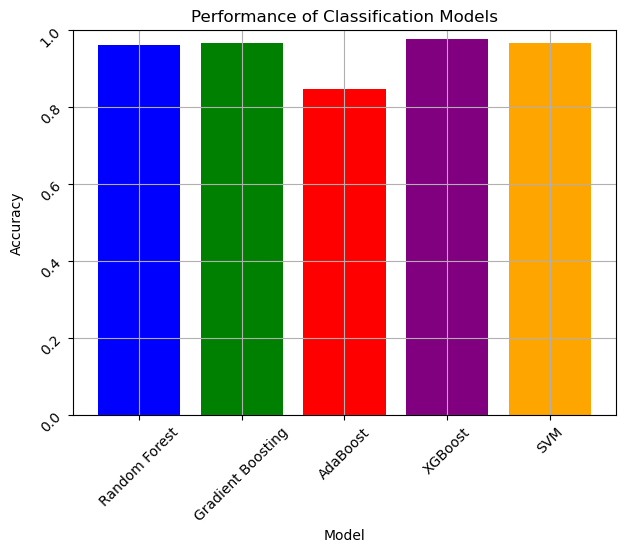

In [50]:
# Plotting the performance
plt.figure(figsize=(7, 5))
plt.bar(performance.keys(), performance.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy', labelpad=10)  # Add padding to prevent overlap
plt.title('Performance of Classification Models')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for accuracy
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.yticks(rotation=45)  # Rotate y-axis labels to 45 degrees
plt.savefig("Performance of Classification Models", dpi = 1080)
plt.show()
